In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
file_path = 'C:\!Projects\DI-Bootcamp\Week8\Day1\data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

<>:2: SyntaxWarning: invalid escape sequence '\!'
<>:2: SyntaxWarning: invalid escape sequence '\!'
C:\Users\kyana\AppData\Local\Temp\ipykernel_18536\1076177225.py:2: SyntaxWarning: invalid escape sequence '\!'
  file_path = 'C:\!Projects\DI-Bootcamp\Week8\Day1\data.csv'


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# Drop the 'Unnamed: 32' column as it seems unnecessary
data = data.drop(columns=['Unnamed: 32'])

# Check the data types of the columns
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

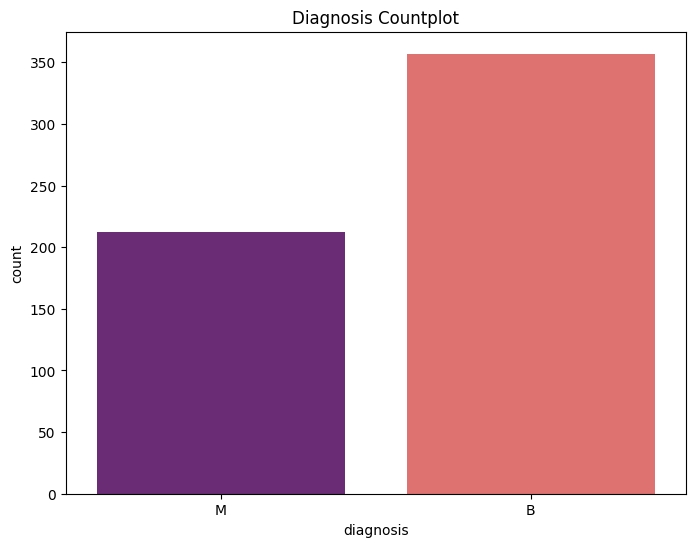

In [5]:
# Create a countplot to display diagnosis
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, palette='magma')
plt.title('Diagnosis Countplot')
plt.show()

In [6]:
# Map categorical values to numerical values
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [7]:
# Split the data into train and test sets
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

In [9]:
# K Nearest Neighbours
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

In [10]:
# Random Forests
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [11]:
# Support Vector Machines (SVM)
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

In [12]:
# Display accuracies
print(f"Logistic Regression Accuracy: {log_reg_accuracy}")
print(f"K Nearest Neighbours Accuracy: {knn_accuracy}")
print(f"Random Forests Accuracy: {rf_accuracy}")
print(f"Support Vector Machines Accuracy: {svm_accuracy}")

Logistic Regression Accuracy: 0.956140350877193
K Nearest Neighbours Accuracy: 0.956140350877193
Random Forests Accuracy: 0.9649122807017544
Support Vector Machines Accuracy: 0.9473684210526315


In [13]:
# Determine the best model
accuracies = {
    "Logistic Regression": log_reg_accuracy,
    "K Nearest Neighbours": knn_accuracy,
    "Random Forests": rf_accuracy,
    "Support Vector Machines": svm_accuracy
}

best_model = max(accuracies, key=accuracies.get)
print(f"The best model is {best_model} with an accuracy of {max(accuracies.values())}")

The best model is Random Forests with an accuracy of 0.9649122807017544
